![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

In [5]:
target = 'Attrition'

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

In [38]:
feature = 'Gender'

① 교차표(pd.crosstab())

In [7]:
temp = pd.crosstab( data[feature],data[target], normalize = 'columns')
temp

Attrition,0,1
Gender,,
Female,0.400952,0.345
Male,0.599048,0.655


② 시각화( Stacked Bar, Mosaic)

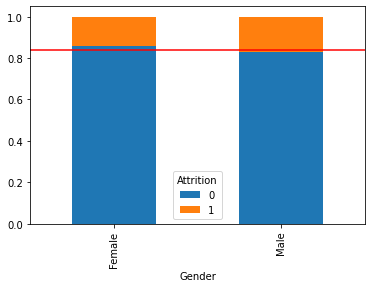

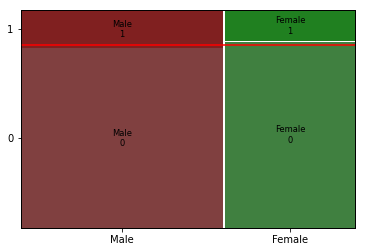

In [40]:
temp = pd.crosstab( data[feature],data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

mosaic(data, [ feature,target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 이직율 평균값과 남녀 별 이직율 평균값이 그래프 상에서는 거의 일치하게 보인다.
    * 남녀별 이직율은 관련이 없어 보인다.


③ 가설검정(카이제곱검정)

In [14]:
# 먼저 집계
table = pd.crosstab(data[feature],data[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
자유도 1


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정
    * 카이제곱통계량이 작은 값으로 나오고 p - value 또한 0.05보다 크다
    * 가설검정을 통해서도 관련이 있어보이진 않는다.
* 결론
    *  이직율과 약한 관계인 Attrition

#### 2) MaritalStatus --> Attrtion

In [16]:
feature ='MaritalStatus'

① 교차표(pd.crosstab())

In [17]:
temp = pd.crosstab( data[feature],data[target], normalize = 'columns')
temp

Attrition,0,1
MaritalStatus,,
Divorced,0.240952,0.115
Married,0.477143,0.345
Single,0.281905,0.540


② 시각화( Stacked Bar, Mosaic)

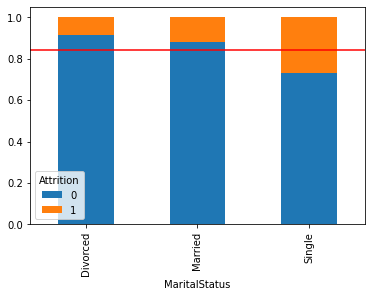

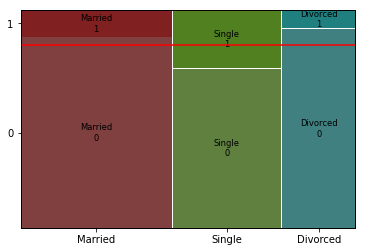

In [18]:
temp = pd.crosstab( data[feature],data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

mosaic(data, [ feature,target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 결혼 상태와 싱글,이혼 여부 이렇게 크게 2개로 봤을 때 이직율에 차이가 보인다.
    * 결혼상태 일때 이직율이 적다. => 가정이 생기고 책임감이 더 무거워져서??
    * 싱글과 이혼여부는 결혼보다는 비교적 더 선택에 자유로울것이다.

③ 가설검정(카이제곱검정)

In [19]:
# 먼저 집계
table = pd.crosstab(data[feature],data[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
자유도 2


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정
    * 카이제곱통계량이 53으로 큰 값이 나오고 p - value 또한 거의 0에 수렴하도록 나왔다.
    * 가설검정을 통해서도 관련이 크게 있는것으로 보인다.
* 결론
    *  이직율과 강한 관계인 MaritalStatus

#### 3) JobSatisfaction --> Attrtion

In [20]:
feature ='JobSatisfaction'

① 교차표(pd.crosstab())

In [21]:
temp = pd.crosstab( data[feature],data[target], normalize = 'columns')
temp

Attrition,0,1
JobSatisfaction,,
1,0.187619,0.265
2,0.186667,0.195
3,0.293333,0.300
4,0.332381,0.240


② 시각화( Stacked Bar, Mosaic)

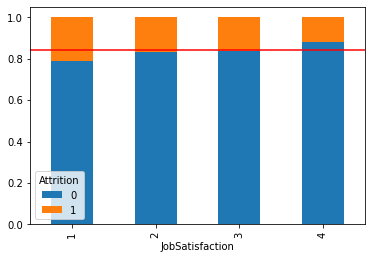

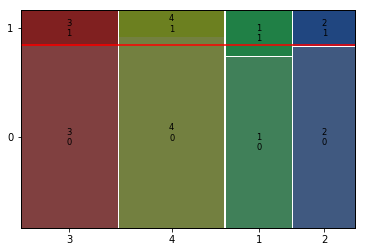

In [22]:
temp = pd.crosstab( data[feature],data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

mosaic(data, [ feature,target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 직무 만족도는 크게 봤을 때는 이직율과 관계가 있지만 그렇게 커 보이진 않는다.
    * 1,4 두 범주만 본다면 1이 이직율이 더 높고 4가 더 낮은걸 볼 수 있다.
    * 추가분석사항
        * 범주를 2개로 줄여서 보자

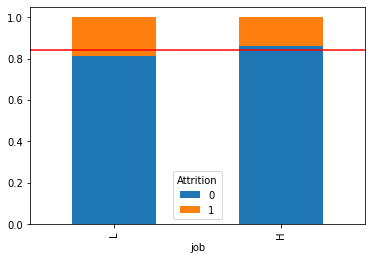

In [77]:
bins = [0,2,4]
labels = ['L','H']
data['job'] = pd.cut(data['JobSatisfaction'], right = True
                        , bins = bins, labels = labels)
data.head()

temp = pd.crosstab( data['job'],data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

* 두개의 범주로 줄여서 봤지만 관계가 더 없어진 것으로 보인다.
* 결과적으로 직무 만족도는 큰 관계를 보이지 않는다.

③ 가설검정(카이제곱검정)

In [24]:
# 먼저 집계
table = pd.crosstab(data[feature],data[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
자유도 3


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정
    * 카이제곱통계량이 9.6값이 나오고 p - value 또한 거의 0.02이로 관계를 보이지만 그렇게 커 보이진 않음
    * 가설검정을 통해서도 관련이 커 보이진 않는다.
* 결론
    *  이직율과 중간 관계인 JobSatisfaction
    * 그래도 무시할 수는 없음

#### 4) RelationshipSatisfaction --> Attrtion

In [83]:
# 동료와의 관계
feature='RelationshipSatisfaction'

① 교차표(pd.crosstab())

In [79]:
temp = pd.crosstab( data[feature],data[target], normalize = 'columns')
temp

Attrition,0,1
RelationshipSatisfaction,,
1,0.174286,0.235
2,0.206667,0.205
3,0.320952,0.300
4,0.298095,0.260


② 시각화( Stacked Bar, Mosaic)

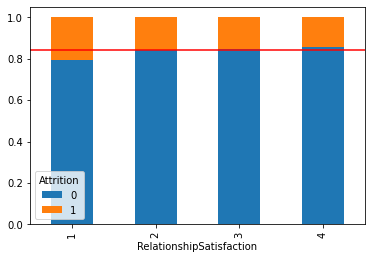

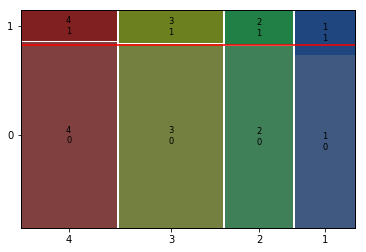

In [82]:
temp = pd.crosstab( data[feature],data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

mosaic(data, [ feature,target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 관계를 찾기 힘듬

③ 가설검정(카이제곱검정)

In [84]:
# 먼저 집계
table = pd.crosstab(data[feature],data[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 4.435126158518535
p-value 0.2181503949975081
자유도 3


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 관계가 없음

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [41]:
feature ='Age'

① 그래프 : histogram, densityplot

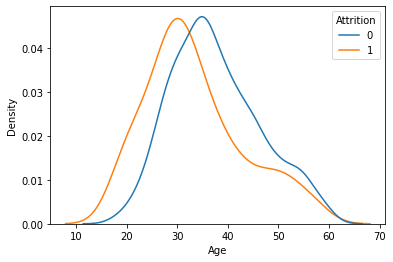

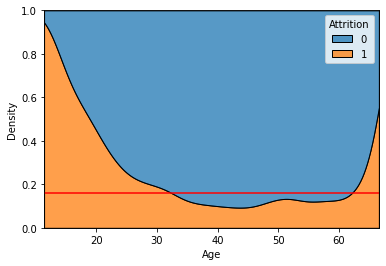

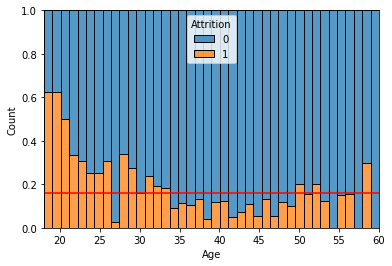

In [42]:
sns.kdeplot(x=feature,data=data,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r') # 이직율 평균선
plt.show()

sns.histplot(x= feature, data = data, bins = 40 # 1살 단위로
            , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 1살 단위로 봤을 때 18~34살 까지 평균 이직율을 넘어서고 있다 => 인턴,계약직,적성차이로 인한 이직
    * 27살에서 갑자기 이직율이 낮아지는 이유는?? => 알아볼 필요가 있음
    * 50살을 기준으로 이직율이 높아지고 있음 => 명예퇴직 또는 정년퇴임 등 정책으로 추정
    * 나이별로 이직율은 관계가 있음(강한정도)
    * 추가분석사항
        * 27살에 갑자기 이직율이 낮아진 이유

>

② 수치화 : 로지스틱회귀

In [32]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 로지스틱회귀
    * 로지스틱 회귀에서 값이 0에 거의 수렴하고 있다.
    * 수치를 통해 큰 관계가 있다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프또한 강한 관계를 보이고 있으므로 함께 보면서 판단!
* 결론
    *  이직율과 강한 관계인 Age

>

#### 2) DistanceFromHome --> Attrtion


In [43]:
feature ='DistanceFromHome'

① 그래프 : histogram, densityplot

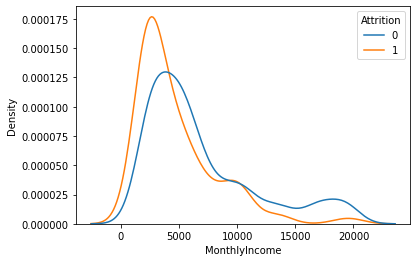

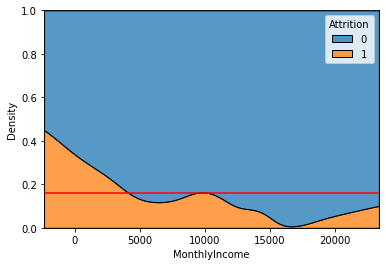

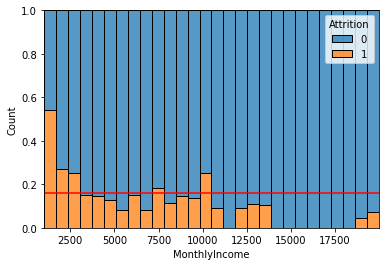

In [71]:
sns.kdeplot(x=feature,data=data,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r') # 이직율 평균선
plt.show()

sns.histplot(x= feature, data = data, bins = 28 # 1마일 단위로
            , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 회사와 거리가 높아질 수록 이직율은 높아지고 있음
    * 회사와 거리가 10마일 전인 직원들이 많음 => 기숙사, 숙소 활용?
    * 그래프로는 거리와 관계가 커 보임
    * 추가분석사항
        * 

>

② 수치화 : 로지스틱회귀

In [55]:
temp = data.loc[data[feature].notnull()]
temp.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome             0
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

In [56]:
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 로지스틱회귀
    * 로지스틱 회귀에서 값이 0에 거의 수렴하고 있다.
    * 수치를 통해 큰 관계가 있다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프또한 강한 관계를 보이고 있으므로 함께 보면서 판단!
* 결론
    * 이율과 강한 관계인 직장과의 거리(DistanceFromHome)
    * Age보다는 비교적 약함

> 

#### 3) MonthlyIncome --> Attrtion


In [57]:
# 월급
feature='MonthlyIncome'

① 그래프 : histogram, densityplot

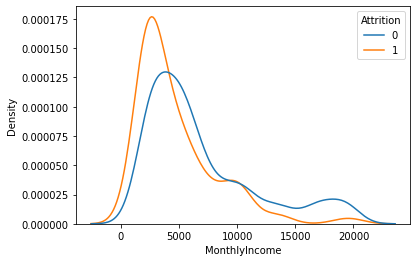

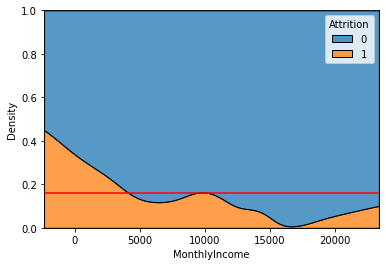

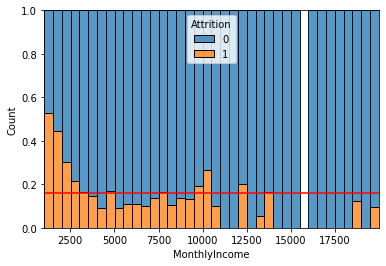

In [67]:
sns.kdeplot(x=feature,data=data,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r') # 이직율 평균선
plt.show()

sns.histplot(x= feature, data = data, bins = 38# 100 단위로
            , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프로 봤을 때
    * 2700 전으로는 이직율이 평균보다 높고 그 후는 평균보다 낮다
    * 월급에 따라 이직율이 차이를 보이고 있음
    * 10000~11000달러에서 갑자기 이직율이 높아짐 => 한계? 명예퇴직으로 예상함
    * 추가분석사항
        * 나이에 따라 월급분포를 보자
        * => 나이와 월급 관계가 있어보인다.

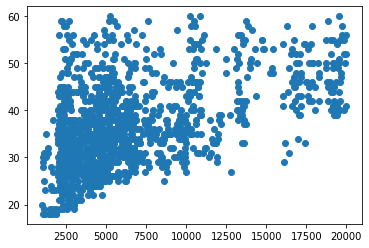

In [75]:
data.groupby(['MonthlyIncome','Age'], as_index = False)[target].mean()
plt.scatter(data['MonthlyIncome'], data['Age'])
plt.show()

* 나이와 월급이 큰 관계를 보이진 않지만 관계가 있다는 것을 알 수있다.
* 10000달러 부근에서 나이대분포가 넓은 것으로 보아 명예퇴직 가능성이 더 확실해짐

> 

② 수치화 : 로지스틱회귀

In [69]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 로지스틱회귀
    * 로지스틱 회귀에서 값이 0에 거의 수렴하고 있다.
    * 수치를 통해 큰 관계가 있다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프또한 강한 관계를 보이고 있으므로 함께 보면서 판단!
* 결론
    * 이율과 강한 관계인 월급(MonthlyIncome)
    * Age보다는 비교적 약함

## 4.관계 정리

### 1) 강한관계의 변수

* MaritalStatus,Age,DistanceFromHome,MonthlyIncome

### 2) 중간관계의 변수

* JobSatisfaction

### 3) (거의)관계 없음

* Attrition, RelationshipSatisfaction